같은 데이터로 0, 1로 학습해버리면?!

In [33]:
import numpy as np
from torch.optim import Adam
from torch.nn import BCELoss,MSELoss
import torch

x_data = np.random.randn(100,2)
x_data = torch.tensor(x_data,dtype=torch.float32)
ones_data = torch.ones((100,1),dtype=torch.float32)
zeros_data = torch.zeros((100,1),dtype=torch.float32)


In [34]:
class myModel(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Linear(2,16),
            torch.nn.ReLU(),
            torch.nn.Linear(16,8),
            torch.nn.ReLU(),
            torch.nn.Linear(8,1),
            
            #torch.nn.Sigmoid()
        )
    def forward(self,x):
        return self.model(x)


In [35]:
model = myModel()
optim = Adam(model.parameters(),lr=0.01)
loss_fn = MSELoss()
num_epoch=100

value_hist =[]
loss_hist =[]
def train_something():
    global model, x_data,ones_data,zeros_data,optim,loss_fn, num_epoch,value_hist,loss_hist
    
    for epoch in range(1,num_epoch+1):
        optim.zero_grad()
        y_pred = model(x_data)
        if epoch%2==1:
            loss=loss_fn(y_pred,ones_data)
        else:
            loss=loss_fn(y_pred,zeros_data)
        loss.backward()
        optim.step()
        
        loss_hist.append(loss.item())

        if epoch%(num_epoch//10)==0:
            print(f"epoch {epoch},loss {loss.item():.2f}")
    
            choice = np.random.choice(100,5)
            choiced_x = x_data[choice]
            value =model(choiced_x)
            t = value.flatten().detach().numpy()
            value_hist.append(t)



In [36]:
train_something()

epoch 10,loss 0.15
epoch 20,loss 0.31
epoch 30,loss 0.26
epoch 40,loss 0.23
epoch 50,loss 0.24
epoch 60,loss 0.25
epoch 70,loss 0.25
epoch 80,loss 0.25
epoch 90,loss 0.25
epoch 100,loss 0.25


In [37]:
import matplotlib.pyplot as plt

def visualize_value():
    global value_hist
    plt.figure(figsize=(16,4))
    cm = plt.cm.rainbow(np.linspace(0,1,10))
    for i in range(0,10,1):
        plt.scatter(np.arange(5*i+1,5*i+6,1),value_hist[i],s=20)

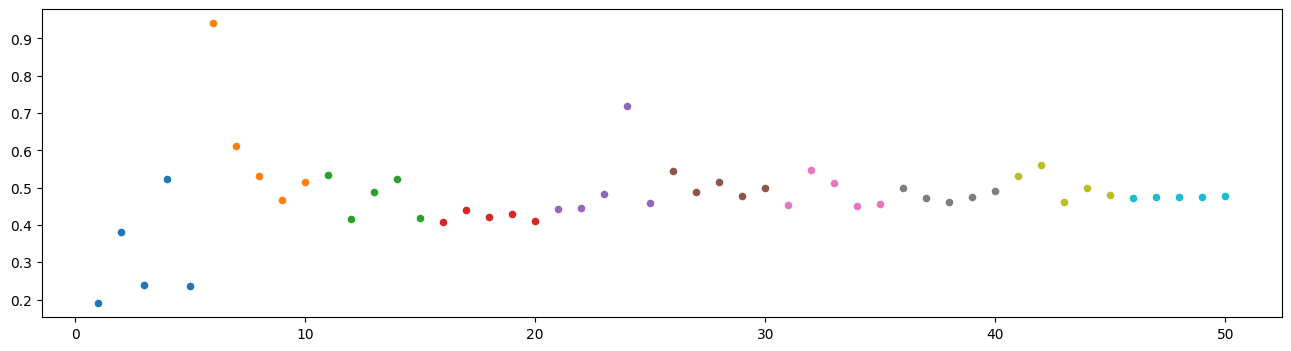

In [38]:
visualize_value()

In [39]:
test_data = np.array([0.3,5.3])
test_data = torch.tensor(test_data,dtype=torch.float32)
print(test_data)
model(test_data)

tensor([0.3000, 5.3000])


tensor([0.8680], grad_fn=<AddBackward0>)

In [40]:
def visualize_loss():
    global loss_hist
    plt.figure(figsize=(4,4))
    plt.plot(np.arange(1,len(loss_hist)+1),loss_hist)

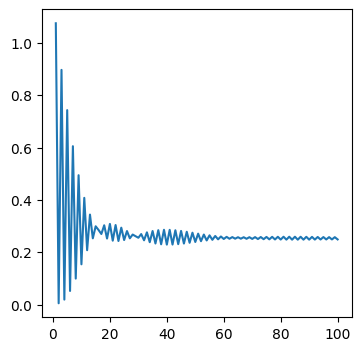

In [41]:
visualize_loss()

In [42]:
x_data = np.random.randn(5,2)
x_data= torch.tensor(x_data,dtype=torch.float32)
print(x_data)


tensor([[ 0.3536,  0.3442],
        [ 0.4182,  0.7131],
        [-1.0312, -0.7732],
        [-0.3007,  0.2404],
        [ 0.5583, -0.5236]])


In [43]:
ch = np.array([0,1])
print(x_data[0,1])
print(x_data[ch])

tensor(0.3442)
tensor([[0.3536, 0.3442],
        [0.4182, 0.7131]])


In [44]:
choice = np.random.choice(5,3)
print(choice,choice.shape)
value =model(x_data[choice])

print(value.flatten().detach().numpy())

[1 4 4] (3,)
[0.46813115 0.46297473 0.46297473]
